In [30]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=17e6fa11a14028f5d84c3111cf55faff780aa8ee84e717d0e1d55c911c11abd7
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


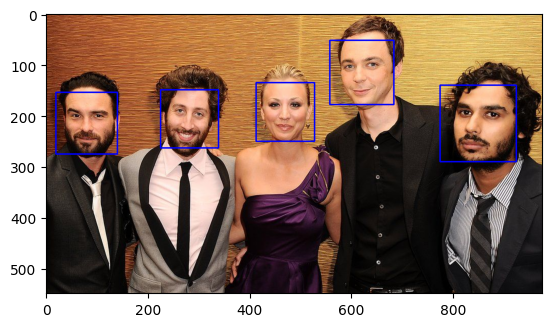

In [11]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Carregar o classificador de rostos
classificador = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Carregar a imagem
imagem = cv2.imread("pessoas.jpg")
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Detectar rostos
rostos = classificador.detectMultiScale(imagem_cinza, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Desenhar retângulos ao redor dos rostos
for (x, y, w, h) in rostos:
    cv2.rectangle(imagem, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Exibir a imagem com os rostos destacados
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!ls /content/drive/MyDrive/

 20200716_143052.mp4
 20200716_143800.mp4
 20200716_144400.mp4
 20200716_145044.mp4
 20200716_145653.mp4
 7109341674383.pdf
 Classroom
'Colab Notebooks'
 dataset-rostos
 Doubt.2008.720p.BluRay.x264.YIFY.mp4
 DSC_0628.JPG
 DSC_0690.JPG
 DSC_0699.JPG
 DSC_0817.JPG
 DSC_0826.JPG
'FENIX YTB.mp4'
'Formulário sem título.gform'
 gatogay.jpeg
'Instagram post by _pantskind_BzIhLsSg43l(MP4).mp4'
'juj-ryoa-hgu – 21 de mai. de 2021.gjam'
'juj-ryoa-hgu – 21 de mai. de 2021.pdf'
 legenda
'Meu Vídeo99.mp4'
 pipeline.drawio.png
'PROVA DE HISTÓRIA.txt'
 Química_V2.pdf
 Retriever_Embedding_experiments.ipynb
 VID_160120121_034247_409.mp4
'VID-20190720-WA0025 (1).mp4'
 VID-20190720-WA0025.mp4
 VID-20190720-WA0040.mp4
 VID-20190720-WA0041.mp4
'VID-20190720-WA0042 (1).mp4'
'VID-20190720-WA0042 (2).mp4'
 VID-20190720-WA0042.mp4
'VID-20190720-WA0043 (1).mp4'
 VID-20190720-WA0043.mp4
 VID-20190720-WA0044.mp4
 VID-20190720-WA0060.mp4
'VIDEO RETARDADO PARTE 1.mp4'
'WhatsApp Image 2020-05-12 at 21.16.24 (1).

In [22]:
!cp -r "/content/drive/MyDrive/dataset-rostos" /content/


In [24]:
import os
from PIL import Image

# Função para limpar imagens quebradas e limitar a quantidade de imagens por categoria
def clean_and_limit_images(data_dir, categories, limit):
    for category in categories:
        category_path = os.path.join(data_dir, category)
        images = os.listdir(category_path)
        valid_images = []

        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            try:
                img = Image.open(img_path)
                img.verify()  # Verifica se a imagem está quebrada
                valid_images.append(img_name)
            except (IOError, SyntaxError):
                os.remove(img_path)  # Remove a imagem quebrada

        # Limita a quantidade de imagens por categoria
        for img_name in valid_images[limit:]:
            os.remove(os.path.join(category_path, img_name))

# URL do dataset e caminhos dos arquivos
data_dir = "/content/dataset-rostos"
categories = ["Enzo", "leonard","raj","sheldon","unknown","howard"]
limit = 30




# Limpar imagens quebradas e limitar a quantidade de imagens por categoria
print("Limpando imagens quebradas e limitando a quantidade de imagens por categoria")
clean_and_limit_images(data_dir, categories, limit)

# Verificar o conteúdo extraído
print("Conteúdo extraído:")
for category in categories:
    print(f"{category}: {len(os.listdir(os.path.join(data_dir, category)))} imagens")

Limpando imagens quebradas e limitando a quantidade de imagens por categoria
Conteúdo extraído:
Enzo: 16 imagens
leonard: 23 imagens
raj: 30 imagens
sheldon: 30 imagens
unknown: 10 imagens
howard: 30 imagens


In [31]:
import os
import numpy as np
from deepface import DeepFace
import pickle

# Diretório do dataset
data_dir = "/content/dataset-rostos"

# Dicionário para armazenar embeddings
embeddings = []
labels = []

# Percorrer cada pasta (classe)
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            # Gerar embedding com DeepFace
            embedding = DeepFace.represent(img_path, model_name="Facenet")[0]['embedding']
            embeddings.append(embedding)
            labels.append(class_name)
        except:
            print(f"Erro ao processar {img_path}")

# Converter para NumPy
X = np.array(embeddings)
y = np.array(labels)

# Salvar os embeddings para uso futuro
with open("embeddings.pkl", "wb") as f:
    pickle.dump((X, y), f)

print("✅ Embeddings extraídos e salvos!")

25-02-17 19:50:32 - Directory /root/.deepface has been created
25-02-17 19:50:32 - Directory /root/.deepface/weights has been created
25-02-17 19:50:36 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:02<00:00, 34.3MB/s]


Erro ao processar /content/dataset-rostos/unknown/8.jpg
Erro ao processar /content/dataset-rostos/Enzo/WIN_20250217_12_24_38_Pro.jpg
Erro ao processar /content/dataset-rostos/Enzo/WIN_20250217_12_24_37_Pro.jpg
Erro ao processar /content/dataset-rostos/Enzo/WIN_20250217_12_24_49_Pro.jpg
Erro ao processar /content/dataset-rostos/Enzo/WIN_20250217_12_24_50_Pro.jpg
Erro ao processar /content/dataset-rostos/leonard/leonard12.png
✅ Embeddings extraídos e salvos!


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle

# Carregar embeddings
with open("embeddings.pkl", "rb") as f:
    X, y = pickle.load(f)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Treinar um classificador SVM
clf = SVC(kernel="linear", probability=True)
clf.fit(X_train, y_train)

# Salvar modelo treinado
with open("modelo_svm.pkl", "wb") as f:
    pickle.dump(clf, f)

print("✅ Modelo treinado e salvo!")


✅ Modelo treinado e salvo!


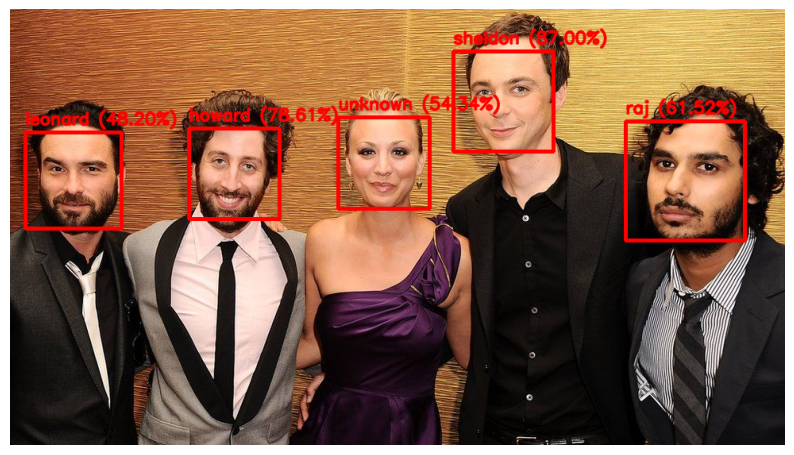

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from deepface import DeepFace

# Carregar modelo treinado
with open("modelo_svm.pkl", "rb") as f:
    clf = pickle.load(f)

# Função para processar a imagem
def processar_imagem(img_name):
    # Caminho da imagem de teste
    img_path = f"/content/{img_name}"

    # Carregar imagem
    img = cv2.imread(img_path)

    # Verificar se a imagem foi carregada corretamente
    if img is None:
        raise FileNotFoundError(f"Erro: Não foi possível carregar a imagem em {img_path}. Verifique o caminho.")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter para RGB

    # Detectar rostos na imagem
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("Nenhum rosto detectado.")
    else:
        plt.figure(figsize=(10, 6))

        for (x, y, w, h) in faces:
            face_crop = img[y:y+h, x:x+w]  # Recortar rosto

            try:
                # Extrair embedding do rosto
                embedding = DeepFace.represent(face_crop, model_name="Facenet")[0]['embedding']

                # Fazer previsão com SVM
                predicao = clf.predict([embedding])[0]
                probabilidades = clf.predict_proba([embedding])[0]
                confianca = max(probabilidades) * 100  # Confiança da previsão

                # Desenhar retângulo no rosto
                cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)

                # Adicionar rótulo com o nome e a confiança
                label = f"{predicao} ({confianca:.2f}%)"
                cv2.putText(img_rgb, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)

            except Exception as e:
                print(f"Erro ao processar rosto: {e}")

        # Exibir imagem com os rótulos
        plt.imshow(img_rgb)
        plt.axis("off")
        plt.show()

# Exemplo de uso da função
processar_imagem("pessoas.jpg")


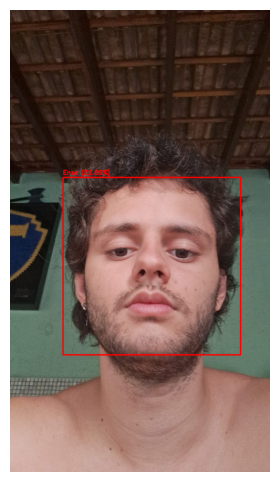

In [41]:
processar_imagem("ft.jpeg")